In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## 1.Import

In [3]:
df = pd.read_csv('../data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Preprocessing & EDA

### 2.1. Detect Missing Value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# Statistical summary of data frame.
round(df.describe(),4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [5]:
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
# Function to calculate missing values by column
def check_na(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
check_na(df)

Your selected dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**note**

* x: all float, y: int
* no missing value
* let's check whether to scalue the time

### 2.2. Visualization

Total Transaction:  284807
No Frauds (Class = 0):  284315 ( 99.83 )%
Frauds (Class = 1):  492 ( 0.17 )%


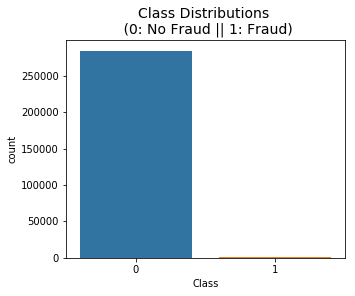

In [9]:
# viz the class distribution
plt.subplots(1, 1, figsize=(5,4))
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

print('Total Transaction: ', len(df))
print('No Frauds (Class = 0): ', df['Class'].value_counts()[0], '(',round(df['Class'].value_counts()[0]/len(df) * 100,2), ')%')
print('Frauds (Class = 1): ', df['Class'].value_counts()[1], '(', round(df['Class'].value_counts()[1]/len(df)*100,2), ')%')

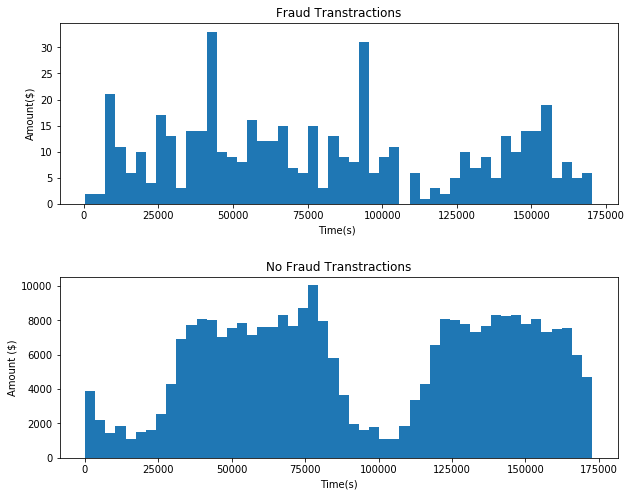

In [10]:
# time compares across fraudulent and normal transactions.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(10,8))
# make a little extra space between the subplots
f.subplots_adjust(hspace=0.4)

ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title('Fraud Transtractions')
ax1.set_xlabel('Time(s) ')
ax1.set_ylabel('Amount($)')

ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title('No Fraud Transtractions')
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Amount ($)')

plt.show()

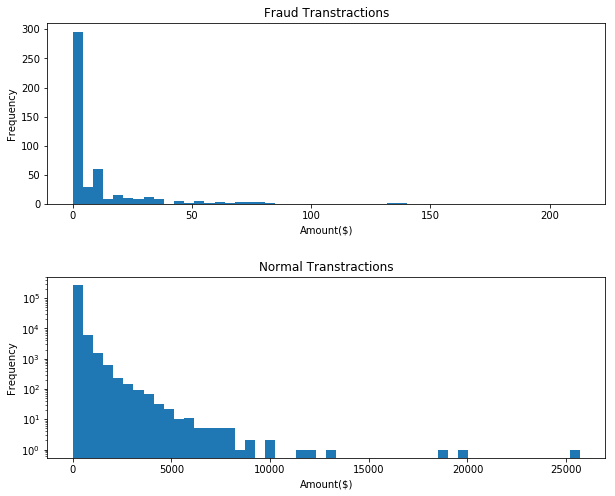

In [12]:
# Split the transtraction
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(10,8))
f.subplots_adjust(hspace=0.4)

ax1.hist(df.Amount[df.Class == 1]/10, bins = 50)
ax1.set_title('Fraud Transtractions')
ax1.set_xlabel('Amount($)')
ax1.set_ylabel('Frequency')

ax2.hist(df.Amount[df.Class == 0], bins = 50)
ax2.set_title('Normal Transtractions')
ax2.set_xlabel('Amount($)')
ax2.set_ylabel('Frequency')

plt.yscale('log')
plt.show()

**Note:** 
* imbalance
* dont scale the time and amount

### 2.3.  Spliting and Scaling

In [4]:
from sklearn.model_selection import train_test_split
x = df.ix[:, df.columns != 'Class']
y = df.ix[:, df.columns == 'Class']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

print(x_train.shape, x_test.shape,'\n',
      y_train.shape, y_test.shape)

(190820, 30) (93987, 30) 
 (190820, 1) (93987, 1)


In [5]:
'''# numpy approach to split data into 3 set.
# Split the dataset into train, validation and test with 60%, 20% and 20% seperatly. 
train, validate, test = np.split(df.sample(frac=1, random_state = 6), [int(.6*len(df)), int(.8*len(df))])

train_X = train.drop('Class', axis = 1)
train_Y = pd.DataFrame(train['Class'])

validate_X = validate.drop('Class', axis = 1)
validate_Y = pd.DataFrame(validate['Class'])

test_X = test.drop('Class', axis = 1)
test_Y = pd.DataFrame(test['Class'])

print(train.shape, validate.shape,test.shape,'\n',
      train_X.shape, validate_X.shape, test_X.shape,'\n',
      train_Y.shape, validate_Y.shape, test_Y.shape)'''

In [ ]:
'''
**Note:** When we train the scaling object, we want to use only the training set. 
When we transform features, we will transform both the training set and the testing set.
I do feature scaling/normalization over the training data and save the mean and variance. 
Then I apply feature normalization to the predictor variables of the validation and test data sets using the training mean and variances.

'''
'''
# 2. To apply a general machine learning approach, we scaled the Time and Amount but keep the original column for cost-sensitive aproach later. Scaling the Amount and Time in train set and using saved mean and variance to scale the validate and test set.
# Scaling the Time and Amount
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

# Fit Amount on the traing data
amount = train_X['Amount'].values.reshape(-1,1)
scaler.fit(amount)
mean_amount = scaler.mean_
var_amount = scaler.var_

print(f'The mean of Amount on training set equals to {mean_amount}')
print(f'The variance of Amount on training set equals to {var_amount}')
print('Using above mean and variance to transform the validate set and test set')

train_X['scaled_Amount'] = scaler.transform(amount)
validate_X['scaled_Amount'] = scaler.transform(validate_X['Amount'].values.reshape(-1,1))
test_X['scaled_Amount'] = scaler.transform(test_X['Amount'].values.reshape(-1,1))

#test_X[['Amount','scaled_Amount']].describe()


print('-------------------------------------------------------')
# Fit Amount on the traing data
time = train_X['Time'].values.reshape(-1,1)
scaler.fit(time)
mean_time = scaler.mean_
var_time = scaler.var_

print(f'The mean of Amount on training set equals to {mean_time}')
print(f'The variance of Amount on training set equals to {var_time}')
print('Using above mean and variance to transform the validate set and test set')

train_X['scaled_Time'] = scaler.transform(time)
validate_X['scaled_Time'] = scaler.transform(validate_X['Time'].values.reshape(-1,1))
test_X['scaled_Time'] = scaler.transform(test_X['Time'].values.reshape(-1,1))

print('------------------------------------------------------------')
#validate_X.columns


train_X_scaledAmt = train_X.drop(['Time','Amount'],axis = 1)
train_X_Amt = train_X.drop(['scaled_Amount','Time'], axis = 1)

validate_X_scaledAmt = validate_X.drop(['Time','Amount'],axis = 1)
validate_X_Amt = validate_X.drop(['scaled_Amount','Time'], axis = 1)

test_X_scaledAmt = test_X.drop(['Time','Amount'],axis = 1)
test_X_Amt = test_X.drop(['scaled_Amount','Time'], axis = 1)
'''

## 3. Model Building

In [6]:
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

**create the baseline**

In [7]:
def create_baseline(x_train, y_train, x_test, y_test):
    '''
    To use cost-sensitive approach, I didnt scale the Amount feature.
    Therefore, I didnt use distance based model
    By considering the model performance and query time, I select random forest, decision tree and logistic regression
    as "base line" models.
    '''
    classifiers = {"RF": {"m": RandomForestClassifier(max_depth=4, min_samples_leaf =1, min_samples_split=2)},
                   "DT": {"m": DecisionTreeClassifier(max_depth=4, min_samples_leaf =4, min_samples_split=2)},
                   "LR": {"m": LogisticRegression(penalty = "l1", C =10)}}
                   #"Ada":{"m": AdaBoostClassifier()},
                   #"KNN":{"m": KNeighborsClassifier()},
                   #"SVC":{"m": SVC(probability=True)}}           
    measures = {"f1": f1_score, "pre": precision_score, 
                "rec": recall_score, "acc": accuracy_score}
    # create result frame
    results = pd.DataFrame(columns=measures.keys())
    # fit the model
    for model in classifiers.keys():
        # Fit
        classifiers[model]["m"].fit(x_train, y_train)
        # Predict
        classifiers[model]["pred"] = classifiers[model]["m"].predict(x_test)
        #classifiers[model]["prob"] = classifiers[model]["m"].predict_proba(x_test)
        #classifiers[model]["prob_train"] = classifiers[model]["m"].predict_proba(x_train)
        # Evaluate each model in classifiers
        results.loc[model] = [measures[measure](y_test, classifiers[model]["pred"]) for measure in measures.keys()]
        
    results.plot.line()
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12)
    return results

,f1,pre,rec,acc
RF,0.792453,0.905172,0.704698,0.999415
DT,0.809859,0.851852,0.771812,0.999425
LR,0.736434,0.871560,0.637584,0.999276


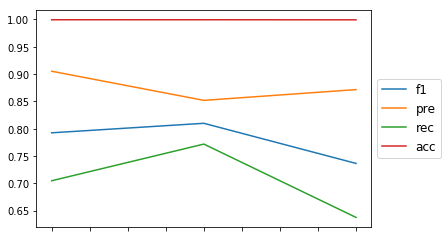

In [8]:
create_baseline(x_train, y_train, x_test, y_test)

**note**

In this case, we can not use acc

### 4 Cost-Sensitive 

**Cost-sensitive Learning**

In regular learning, we treat all misclassifications equally, which causes issues in imbalanced classification problems, as there is no extra reward for identifying the minority class over the majority class. Cost-sensitive learning changes this, and uses a function C(p, t) (usually represented as a matrix) that specifies the cost of misclassifying an instance of class t as class p. This allows us to penalize misclassifications of the minority class more heavily than we do with misclassifications of the majority class, in hopes that this increases the true positive rate. A common scheme for this is to have the cost equal to the inverse of the proportion of the data-set that the class makes up. This increases the penalization as the class size decreases.

**Terms:**

* **True Positives:** Correctly Classified Fraud Transactions
* **False Positives:** Incorrectly Classified Fraud Transactions
* **True Negative:** Correctly Classified Non-Fraud Transactions
* **False Negative:** Incorrectly Classified Non-Fraud Transactions
* **Precision:** True Positives/(True Positives + False Positives)
    * Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
* **Recall:** True Positives/(True Positives + False Negatives)
    
* **Precision/Recall Tradeoff:** The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

**Financial Evaluation of a Fraud Detection Model**

**Motivation**

* Typically, a fraud model is evaluated using standard cost-insensitive measures.
* However, in practice, the cost associated with approving a fraudulent transaction (False Negative) is quite different from the cost associated with declining a legitimate transaction (False Positive).
* Furthermore, the costs are not constant among transactions.
  
  
In order to take into account the varying costs that each example carries and evaluate the classification algorithm, a cost matrix with example-dependent misclassification costs as given in the following table.

This matrix differentiates between the costs of the different outcomes of the classification algorithm, meaning that it differentiates between false positives and false negatives, and also the different costs of each
example. 



  
|cost matrix |Actual Positive ($y_i=1$) |  Actual Negative 	($y_i=0$)|
|---|---|---|
|Predicted Positive ($p_i=1$)|$C_{TP_i}=C_a$|$C_{FP_i}=C_a$ |
|Predicted Negative  ($p_i=0$)|$C_{FN_i}=Amt_i$|$C_{TN_i}=0$|

Where:

* $Amt_i$ = Amount of the transaction i
* $C_a$ is the administrative cost of dealing with an alert
 
Using the cost matrix, we can extract a cost measure as the sum of all individual costs:

$$Total Cost = \sum_{i=1}^{m} {y_i}(p_i C_a + (1-p_i)Amt_i) + (1-y_i)p_i C_a$$


* This measure evaluates the sum of the cost for m transactions, where $y_i$ and $p_i$ are the real and predicted labels.
* The cost improvement can be expressed as the cost savings as compared with $Cost_l(\mathcal{S})$ which is the cost of the costless class. 

**Threshold Optimization**

In [42]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [54]:
def cs_df_generator(model, feature, label, Ca, thresholds):
    result_df = []   
    for i in range(len(thresholds)):           
        model = model.fit(feature, label)
        '''
            The first column is the probability that the entry has the -1 label and the second column is the probability that the entry has the +1 label.
            If you would like to get the predicted probabilities for the positive label only, you can use logistic_model.predict_proba(data)[:,1]
        '''
        label_pred = model.predict_proba(feature)[:,1] > thresholds[i]
        label_pred = 1 * label_pred
        
        # create result frame
        result_i = pd.DataFrame(
            {
                'Amt': feature.Amount.tolist(),
                'y': label.Class.tolist(),
                'p': label_pred
            }
        )
        result_i["Ca"] = Ca
        #cost function 
        result_i["cost"] = result_i.y*(result_i.p*result_i.Ca + (1 - result_i.p)*result_i.Amt) + (1 - result_i.y)*result_i.p*result_i.Ca
        result_i["recall_score"] = recall_score(label, label_pred)
        result_i["precision_score"] = precision_score(label, label_pred)
        result_i["f1_score"] = f1_score(label, label_pred)
        
        result_i = result_i.groupby(['recall_score','precision_score','f1_score'])['cost'].sum().reset_index()
        result_i['threshold'] = thresholds[i]
        result_df.append(result_i)
    
    result_df = pd.concat(result_df, axis = 0, ignore_index = True)
    return result_df

In [55]:
# Assume Ca = 2
clf = LogisticRegression()
result_cs_lr = cs_df_generator(clf, x_train, y_train, 2, thresholds)
result_cs_lr

,recall_score,precision_score,f1_score,cost,threshold
0,0.565598,0.072415,0.128392,31446.03,0.1
1,0.539359,0.118211,0.193920,29833.19,0.2
2,0.521866,0.277090,0.361982,28594.41,0.3
3,0.513120,0.575163,0.542373,28385.43,0.4
4,0.495627,0.682731,0.574324,28593.38,0.5
5,0.489796,0.727273,0.585366,28583.38,0.6
6,0.472303,0.767773,0.584838,28644.88,0.7
7,0.437318,0.819672,0.570342,29395.28,0.8
8,0.431487,0.836158,0.569231,29508.59,0.9


In [46]:
clf = DecisionTreeClassifier(max_depth = 4)
result_cs_dt = cs_df_generator(clf, x_train, y_train, 2, thresholds)
result_cs_dt

,recall_score,precision_score,f1_score,cost,threshold
0,0.816327,0.833333,0.824742,11223.92,0.1
1,0.813411,0.845455,0.829123,11211.93,0.2
2,0.793003,0.912752,0.848674,12820.18,0.3
3,0.793003,0.912752,0.848674,12579.45,0.4
4,0.793003,0.912752,0.848674,12820.18,0.5
5,0.793003,0.912752,0.848674,12579.45,0.6
6,0.725948,0.946768,0.821782,14500.27,0.7
7,0.725948,0.946768,0.821782,14500.27,0.8
8,0.725948,0.946768,0.821782,14259.54,0.9


In [47]:
clf = RandomForestClassifier(max_depth=4)
result_cs_rf = cs_df_generator(clf, x_train, y_train, 2, thresholds)
result_cs_rf

,recall_score,precision_score,f1_score,cost,threshold
0,0.804665,0.762431,0.782979,10998.85,0.1
1,0.795918,0.845201,0.819820,11203.60,0.2
2,0.775510,0.860841,0.815951,12927.92,0.3
3,0.755102,0.921708,0.830128,11907.32,0.4
4,0.746356,0.944649,0.833876,13650.60,0.5
5,0.688047,0.959350,0.801358,15926.79,0.6
6,0.594752,0.971429,0.737794,22784.19,0.7
7,0.524781,0.978261,0.683112,24344.84,0.8
8,0.373178,0.992248,0.542373,32799.65,0.9


In [48]:
def perf_plot(lr_df,rf_df,dt_df):
    output_cost = pd.DataFrame({
        "threshold": lr_df['threshold'],
        "lr cost": lr_df['cost'],
        "rf cost": rf_df['cost'],
        "dt cost": dt_df['cost']
    })

    cost_plot = pd.melt(output_cost, id_vars = 'threshold',
                    var_name = 'classifier', value_name = 'cost')

    output_recall = pd.DataFrame({
        "threshold": lr_df['threshold'],
        "lr recall": lr_df['recall_score'],
        "rf recall": rf_df['recall_score'],
        "dt recall": dt_df['recall_score']
    })

    recall_plot = pd.melt(output_recall, id_vars = 'threshold',
                    var_name = 'classifier', value_name = 'recall')

    fig, ax = plt.subplots(2, 1, figsize=(8,6))
    fig.subplots_adjust(hspace=0.5)

    sns.lineplot(x = 'threshold', y = 'cost', hue = 'classifier', data = cost_plot, ax = ax[0])
    ax[0].set_title('total cost', fontsize = 14)
    ax[0].set_xlabel('threshold')
    ax[0].set_ylabel('amount($)')

    sns.lineplot(x = 'threshold', y = 'recall', hue = 'classifier', data = recall_plot, ax = ax[1])
    ax[1].set_title('performance', fontsize = 14)
    ax[1].set_xlabel('threshold')
    ax[1].set_ylabel('recall score')

    plt.show()

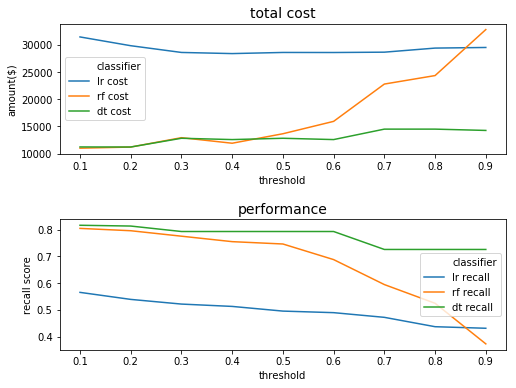

In [49]:
perf_plot(result_cs_lr,result_cs_rf,result_cs_dt)

**Bayes Minimum Risk**

$$R(p_f|x) = L(p_f|y_f)P(p_f|x) + L(p_f|y_n)P(p_n|x)$$
$$R(p_n|x) = L(p_n|y_n)P(p_n|x) + L(p_n|y_f)P(p_f|x)$$


where $$y_f$$ $$y_l$$ are the real labels for fraudulent and
legitimate transactions respectively. $$P(p_l|x)$$ is the estimated
probability of a transaction being legitimate given x, similarly
$$P(p_f |x)$$ is the probability of a transaction being
fraud given x. Finally $$L(a, b)$$ is the loss function when a
transaction is predicted as a and the real label is b. Once
both risks are calculated, a transaction is classified as fraud if
$$R(p_f |x) ≤ R(p_l|x)$$, meaning if the risk associated with that
decision is lower than the risk associated with classifying it
as legitimate.
Since in the credit card fraud detection case the losses are
equal to the cost, we use the cost matrix with fixed cost
for FN as defined

transaction will be
classified as fraud if the following condition is true:
$$C_aP(p_f|x) + C_aP(p_l|x) ≤ Amt_iP(p_f |x)$$



In [12]:
def bmr_cost_df(clf, x, y,Ca):
    clf = clf.fit(x, y.values.ravel())
    prob_fraud = clf.predict_proba(x)[:,1]
    prob_legitimate = clf.predict_proba(x)[:,0]
    Amt = x.Amount.tolist()
    y_true = y.Class.tolist()
    
    
    cost_df = pd.DataFrame({
        "y": y_true,
        "prob_fraud": prob_fraud,
        "prob_legitimate": prob_legitimate,
        "Amt": Amt
    })
    
    cost_df["Ca"] = Ca
    cost_df["risk_fraud"] = cost_df.Ca*cost_df.prob_fraud + cost_df.Ca*cost_df.prob_legitimate
    cost_df["risk_legitimate"] = cost_df.Amt*cost_df.prob_fraud
    
    for i in range(len(y)):
        if cost_df.risk_fraud[i] <= cost_df.risk_legitimate[i]:
            cost_df.ix[i,"p"] = 1
        else:
            cost_df.ix[i,"p"] = 0
    
    cost_df["cost"] = cost_df.y*(cost_df.p*cost_df.Ca + (1 - cost_df.p)*cost_df.Amt) + (1 - cost_df.y)*cost_df.p*cost_df.Ca   
    #result_i["cost"] = result_i.y*(result_i.p*result_i.Ca + (1 - result_i.p)*result_i.Amt) + (1 - result_i.y)*result_i.p*result_i.Ca
    
    return cost_df

In [15]:
def bmr_result(cost_df):
    print("The recall of "+clf.__class__.__name__ + ":", recall_score(cost_df.y, cost_df.p))
    print("The precision of "+clf.__class__.__name__ + ":", precision_score(cost_df.y, cost_df.p))
    print("The f1 score of "+clf.__class__.__name__ + ":", f1_score(cost_df.y, cost_df.p))
    print("The cost of "+clf.__class__.__name__ + ":", cost_df.cost.sum())

In [16]:
clf = LogisticRegression()
cost_df = bmr_cost_df(clf, train_X_Amt, train_Y, 2)
bmr_result(cost_df)

The recall of LogisticRegression: 0.43973941368078173
The precision of LogisticRegression: 0.18417462482946795
The f1 score of LogisticRegression: 0.2596153846153846
The cost of LogisticRegression: 5971.21


In [17]:
clf = DecisionTreeClassifier(max_depth = 4)
cost_df = bmr_cost_df(clf, train_X_Amt, train_Y, 2)
bmr_result(cost_df)

KeyboardInterrupt: 

In [121]:
bmr_recall = recall_score(cost_df.y, cost_df.p)
bmr_precision = precision_score(cost_df.y, cost_df.p)
bmr_f1 = f1_score(cost_df.y, cost_df.p)
bmr_cost = cost_df.cost.sum()

print(bmr_recall)
print(bmr_precision)
print(bmr_f1)
print(bmr_cost)

0.46254071661237783
0.7029702970297029
0.5579567779960707
6834.350000000001


In [ ]:
'''
The optimal model is rfc with threshold 0.5
'''

y_test_pred = clf_rfc.predict_proba(x_test)[:,1] > 0.5
y_test_pred = 1*y_test_pred

y_test_true = y_test
cm_test = confusion_matrix(y_test_true, y_test_pred)

classes_name = ['Legitimate', 'Fraud']

fig = plt.Figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
plot_confusion_matrix(cm_test, classes_name,
                          title='Confusion matrix of Test Data'
                         )

print "Recall is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(2)))
print "Precision is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(1)))

cost_test_df = create_cost_df(clf_rfc, x_test, y_test, thresholds)
print "The cost is %f" % (cost_test_df[cost_test_df.threshold == 0.5]["cost"])

In [ ]:
cost_rf_test = Create_Cost_DF(clf_rfc, x_test, y_test)
y_test_pred = cost_rf_test.p
y_test_true = y_test
cm_test_rf = confusion_matrix(y_test_true, y_test_pred)

classes_name = ['Legitimate', 'Fraud']

fig = plt.Figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
plot_confusion_matrix(cm_test_rf, 
                      classes_name,
                      title='Confusion matrix of Test Data with risk minimum minimization approach'
                     )

print "Recall is %.3f" % (float(cm_test_rf.item(3))/(cm_test_rf.item(3)+cm_test_rf.item(2)))
print "Precision is %.3f" % (float(cm_test_rf.item(3))/(cm_test_rf.item(3)+cm_test_rf.item(1)))
print "The cost is %f" % (cost_rf_test.cost.mean())

In [ ]:
Takeaways:<br>
1. the precision is dramatically low compared to the training data. This is understandable because I downsampled the "normal" class for the better performance of machine learning models. This way models will overestimate the frequency of "fraudulent" transactions leading to a sharp decline in precision.
2. Though a lower recall and precision, risk minimization approach seems to have the lower cost than the threshold approach. But the cost estimation depends heavily on the modeling of cost matrix, whcih means the cost will change correspondingly if the cost matrix changes. 
<br>As a result it is really hard to say which model is better. From my perspective at this point, I prefer to model number 1 because it only has 1.5% higher cost than model 2 but increase recall and precision significantly in return. 